In [30]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

from datetime import datetime

In [31]:
data = pd.read_csv('covid_19_india.csv')
data1 = data.rename(columns={'Name of State / UT':'State','Cured/Discharged/Migrated':'Cured','Total Confirmed cases':'Confirmed'})
data2=data1.groupby('Date')[['Confirmed','Deaths']].sum().reset_index()
data2.head(-10)

,Date,Confirmed,Deaths
0,01/02/20,2,0
1,01/03/20,3,0
2,01/04/20,1834,41
3,01/05/20,34972,1152
4,01/06/20,190535,5394
...,...,...,...
202,29/06/20,548318,16475
203,29/07/20,1531669,34193
204,29/08/20,3463972,62550
205,30/01/20,1,0


In [32]:
today=data1['Date'].max()
df1 = pd.melt(data2, id_vars=['Date'], value_vars=['Confirmed','Deaths'])
fig = px.line(df1, x="Date", y='value', color='variable', title=f"Confirmed cases as on {today}")
fig.show()

In [33]:
train=data1.groupby(['Date','State/UnionTerritory'])[['Confirmed','Deaths']].sum().reset_index()
train.head()

,Date,State/UnionTerritory,Confirmed,Deaths
0,01/02/20,Kerala,2,0
1,01/03/20,Kerala,3,0
2,01/04/20,Andaman and Nicobar Islands,10,0
3,01/04/20,Andhra Pradesh,83,0
4,01/04/20,Assam,1,0


In [34]:
today= data1['Date'].max()
today

'31/08/20'

In [35]:
df1=data1.groupby('State/UnionTerritory')[['Confirmed','Deaths']].sum().reset_index()
top_states = df1.sort_values('Confirmed', ascending=False).iloc[:5]['State/UnionTerritory'].unique()
top_df= data1[data1['State/UnionTerritory'].isin(top_states)]
fig = px.line(top_df, x="Date", y="Confirmed", color="State/UnionTerritory", title=f"Top 5 states as on {today}")
fig.show()

In [36]:
state_wise = data1.query('(Date == @today)').sort_values('Confirmed',ascending= False)
state_wise_df = pd.melt(state_wise, id_vars='State/UnionTerritory', value_vars='Confirmed')
fig = px.bar(state_wise_df, x="State/UnionTerritory", y='value', color='variable', title=f"Confirmed cases as on {today}")
fig.show()

In [37]:
data2['New']= data2['Confirmed']-data2['Confirmed'].shift(1) 
data2

,Date,Confirmed,Deaths,New
0,01/02/20,2,0,NaN
1,01/03/20,3,0,1.0
2,01/04/20,1834,41,1831.0
3,01/05/20,34972,1152,33138.0
4,01/06/20,190535,5394,155563.0
...,...,...,...,...
212,31/01/20,1,0,-3542732.0
213,31/03/20,1397,35,1396.0
214,31/05/20,182143,5164,180746.0
215,31/07/20,1638870,35747,1456727.0


In [38]:
data2['New'].max()

2018800.0

In [39]:
#Found one missing value in the data set. That need to be adjusted by replacing with the roling mean value.
df2= pd.melt(data2,id_vars=['Date'], value_vars=['New'])
fig = px.bar(df2, x="Date", y="value", color='variable', title=f"Daily new cases as on {today}")
fig.show()

In [40]:
states = data1['State/UnionTerritory'].unique()
print(f'{len(states)} States are in dataset:\n{states}')

42 States are in dataset:
['Kerala' 'Telengana' 'Delhi' 'Rajasthan' 'Uttar Pradesh' 'Haryana'
 'Ladakh' 'Tamil Nadu' 'Karnataka' 'Maharashtra' 'Punjab'
 'Jammu and Kashmir' 'Andhra Pradesh' 'Uttarakhand' 'Odisha' 'Puducherry'
 'West Bengal' 'Chhattisgarh' 'Chandigarh' 'Gujarat' 'Himachal Pradesh'
 'Madhya Pradesh' 'Bihar' 'Manipur' 'Mizoram'
 'Andaman and Nicobar Islands' 'Goa' 'Unassigned' 'Assam' 'Jharkhand'
 'Arunachal Pradesh' 'Tripura' 'Nagaland' 'Meghalaya' 'Dadar Nagar Haveli'
 'Cases being reassigned to states' 'Sikkim' 'Daman & Diu'
 'Dadra and Nagar Haveli and Daman and Diu' 'Telangana' 'Telangana***'
 'Telengana***']


In [42]:
today = data1['Date'].max()
print('Date: ', today)
for i in [1, 10, 100, 1000]:
    n_states = len(data1.query('(Date == @today) & Confirmed > @i'))
    print(f'{n_states} States have more than {i} Confirmed')

Date:  31/08/20
35 States have more than 1 Confirmed
35 States have more than 10 Confirmed
35 States have more than 100 Confirmed
35 States have more than 1000 Confirmed


In [43]:
dt = data1[data1['State/UnionTerritory']=='Odisha']
dt.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
168,169,16/03/20,6:00 PM,Odisha,1,0,0,0,1
183,184,17/03/20,6:00 PM,Odisha,1,0,0,0,1
198,199,18/03/20,6:00 PM,Odisha,1,0,0,0,1
216,217,19/03/20,6:00 PM,Odisha,1,0,0,0,1
236,237,20/03/20,6:00 PM,Odisha,2,0,0,0,2


In [44]:
today=data1['Date'].max()
df11 = pd.melt(dt, id_vars=['Date'], value_vars=['Confirmed','Deaths'])
fig = px.line(df11, x="Date", y='value', color='variable', title=f"Confirmed cases in Odisha as on {today}")
fig.show()

In [45]:
dt.drop(dt[dt['Confirmed']==0].index,inplace=True)
dt['New']=dt['Confirmed']-dt['Confirmed'].shift(1)
df12 = pd.melt(dt, id_vars=['Date'], value_vars=['New'])
fig = px.bar(df12, x="Date", y='value', color='variable', title=f"Daily new Confirmed cases in Odisha as on {today}")
fig.show()

In [46]:
df13 = pd.melt(dt, id_vars=['Date'], value_vars=['New'])
fig = px.line(df13, x="Date", y='value', color='variable', title=f"Daily new cases in Odisha as on {today}")
fig.show()

In [50]:
dt.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed', 'New'],
      dtype='object')

According to the reaserch work COVID19 has affected 0.16% of the total population of US, 0.34% population of Spain, 0.15% population of Germany,0.14% of France and 0.24% of Italy. The total population of Odisha is around 43700000 that is near equal to the population of Spain.
Accordingly the COVID19 cases in Odisha would have been 87,400 (0.15% of 43700000). Due to the lock-down the number of confined cases right now 60.

In [58]:
train3=dt.drop(['Sno', 'Time','State/UnionTerritory','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths','Confirmed'], axis = 1)
train3['Mean']= train3.rolling(window=3).mean()
train3['Mean'].fillna(0.1, inplace=True)
train3['Mean'].replace(to_replace =0.0,value =0.2, inplace=True)
train1= train3.drop(['New'], axis=1)
train1

,Date,Mean
168,16/03/20,0.100000
183,17/03/20,0.100000
198,18/03/20,0.100000
216,19/03/20,0.200000
236,20/03/20,0.333333
...,...,...
5710,29/08/20,3479.000000
5745,30/08/20,3439.333333
5780,31/08/20,3316.000000
5815,01/09/20,2956.000000


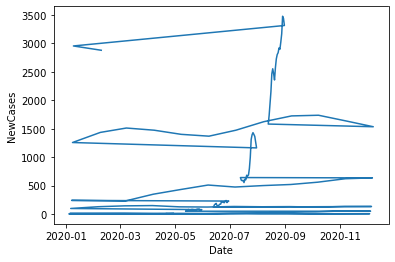

In [59]:
train1['Date']= pd.to_datetime(train1['Date'])
train2=train1.set_index('Date')
plt.xlabel('Date')
plt.ylabel('NewCases')
plt.plot(train2['Mean'])

In [60]:
rolmean = train2['Mean'].rolling(window=2).mean()
rolstd = train2['Mean'].rolling(window =2).std()

In [61]:
from statsmodels.tsa.stattools import adfuller
print('Dicky fuller taste')
dftest = adfuller(train2['Mean'],autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['Test statistics','P-value','#Lags used','Number of observations'])
for key,values in dftest[4].items():
    dfout['Critical values(%s)'%key]=values
print(dfout)

Dicky fuller taste
Test statistics             1.152039
P-value                     0.995637
#Lags used                 12.000000
Number of observations    158.000000
Critical values(1%)        -3.472431
Critical values(5%)        -2.880013
Critical values(10%)       -2.576619
dtype: float64


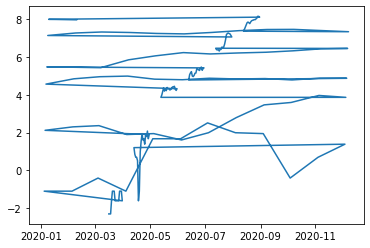

In [62]:
train2_logscale = np.log(train2['Mean'])
train2_logscale.dropna(inplace=True)
plt.plot(train2_logscale)

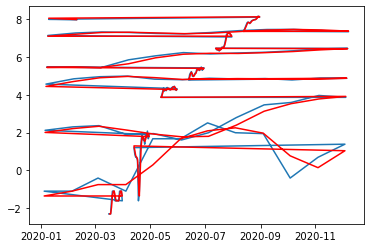

In [63]:
movingAverage = train2_logscale.rolling(window=2).mean()
movingSTD = train2_logscale.rolling(window =2).std()
plt.plot(train2_logscale)
plt.plot(movingAverage,color='red')

In [64]:
tm_log_avg = train2_logscale-movingAverage
tm_log_avg.dropna(inplace=True)
def test_stationary(timeseries):
    movingAverage =timeseries.rolling(window=3).mean()
    movingSTD = timeseries.rolling(window=3).std()
    orig = plt.plot(timeseries,color='blue',label='Orginal')
    avg = plt.plot(movingAverage,color='black',label='Moving Average')
    std = plt.plot(movingSTD,color='red',label='Rollong std')
    plt.legend(loc='best')
    plt.title('Rolling mean and rolling std')
    plt.show()
    
    print('Dicky fuller taste')
    dftest = adfuller(train2['Mean'],autolag='AIC')
    dfout = pd.Series(dftest[0:4],index=['Test statistics','P-value','#Lags used','Number of observations'])
    for key,values in dftest[4].items():
        dfout['Critical values(%s)'%key]=values
        print(dfout)

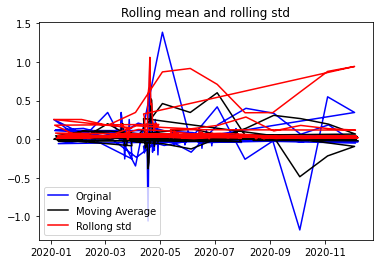

Dicky fuller taste
Test statistics             1.152039
P-value                     0.995637
#Lags used                 12.000000
Number of observations    158.000000
Critical values(1%)        -3.472431
dtype: float64
Test statistics             1.152039
P-value                     0.995637
#Lags used                 12.000000
Number of observations    158.000000
Critical values(1%)        -3.472431
Critical values(5%)        -2.880013
dtype: float64
Test statistics             1.152039
P-value                     0.995637
#Lags used                 12.000000
Number of observations    158.000000
Critical values(1%)        -3.472431
Critical values(5%)        -2.880013
Critical values(10%)       -2.576619
dtype: float64


In [65]:
test_stationary(tm_log_avg)

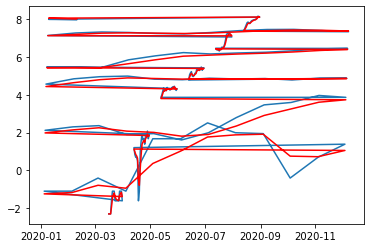

In [66]:
exponential= train2_logscale.ewm(halflife=1,min_periods=0,adjust=True).mean()
plt.plot(train2_logscale)
plt.plot(exponential, color='red')

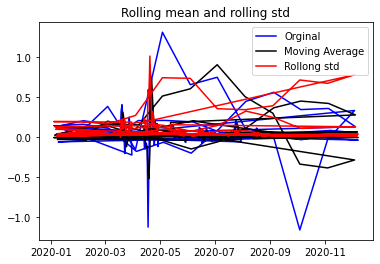

Dicky fuller taste
Test statistics             1.152039
P-value                     0.995637
#Lags used                 12.000000
Number of observations    158.000000
Critical values(1%)        -3.472431
dtype: float64
Test statistics             1.152039
P-value                     0.995637
#Lags used                 12.000000
Number of observations    158.000000
Critical values(1%)        -3.472431
Critical values(5%)        -2.880013
dtype: float64
Test statistics             1.152039
P-value                     0.995637
#Lags used                 12.000000
Number of observations    158.000000
Critical values(1%)        -3.472431
Critical values(5%)        -2.880013
Critical values(10%)       -2.576619
dtype: float64


In [67]:
mexponential = train2_logscale-exponential
test_stationary(mexponential)

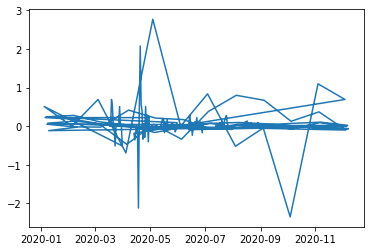

In [68]:
datashifting = train2_logscale-train2_logscale.shift(1)
plt.plot(datashifting)

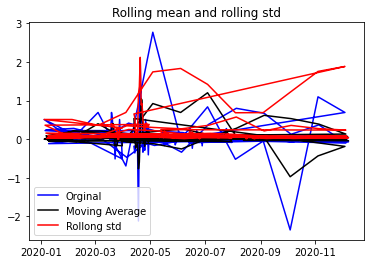

Dicky fuller taste
Test statistics             1.152039
P-value                     0.995637
#Lags used                 12.000000
Number of observations    158.000000
Critical values(1%)        -3.472431
dtype: float64
Test statistics             1.152039
P-value                     0.995637
#Lags used                 12.000000
Number of observations    158.000000
Critical values(1%)        -3.472431
Critical values(5%)        -2.880013
dtype: float64
Test statistics             1.152039
P-value                     0.995637
#Lags used                 12.000000
Number of observations    158.000000
Critical values(1%)        -3.472431
Critical values(5%)        -2.880013
Critical values(10%)       -2.576619
dtype: float64


In [69]:
datashifting.dropna(inplace=True)
test_stationary(datashifting)

Plotting AR model


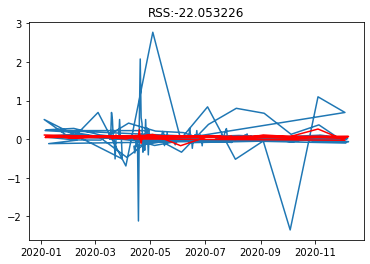

In [70]:
from statsmodels.tsa.arima_model import ARIMA
model =ARIMA(train2_logscale,order=(1,1,0))
results_AR=model.fit(disp=-1)
plt.plot(datashifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%4F'%sum(results_AR.fittedvalues - datashifting**2))
print('Plotting AR model')

Plotting MR model


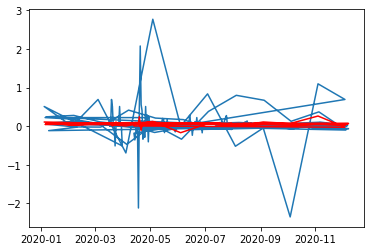

In [71]:
model =ARIMA(train2_logscale,order=(1,1,0))
results_MA =model.fit(disp=-1)
plt.plot(datashifting)
plt.plot(results_MA.fittedvalues,color='red')
print('Plotting MR model') 

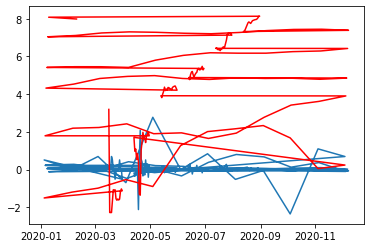

In [72]:
model = ARIMA(train2_logscale,order=(2,0,1))
results_ARIMA= model.fit(disp=-1)
plt.plot(datashifting)
plt.plot(results_ARIMA.fittedvalues,color='red')

In [73]:
predictions_ARIMA_diff= pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Date
2020-03-16    3.190089
2020-03-17   -2.276048
2020-03-18   -2.279617
2020-03-19   -2.277172
2020-03-20   -1.666085
dtype: float64


In [76]:
prediction_ARIMA_log=pd.Series(train2_logscale.iloc[0],index= train2_logscale.index)
prediction_ARIMA_log=prediction_ARIMA_log.add(predictions_ARIMA_diff,fill_value=0)
prediction_ARIMA_log.head()


Date
2020-03-16    0.887504
2020-03-17   -4.578634
2020-03-18   -4.582202
2020-03-19   -4.579757
2020-03-20   -3.968670
dtype: float64

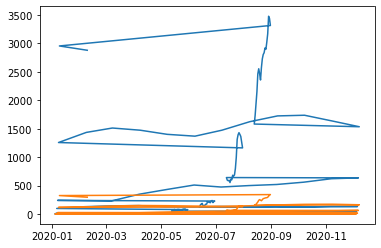

In [77]:
predictions_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(train2)
plt.plot(predictions_ARIMA)

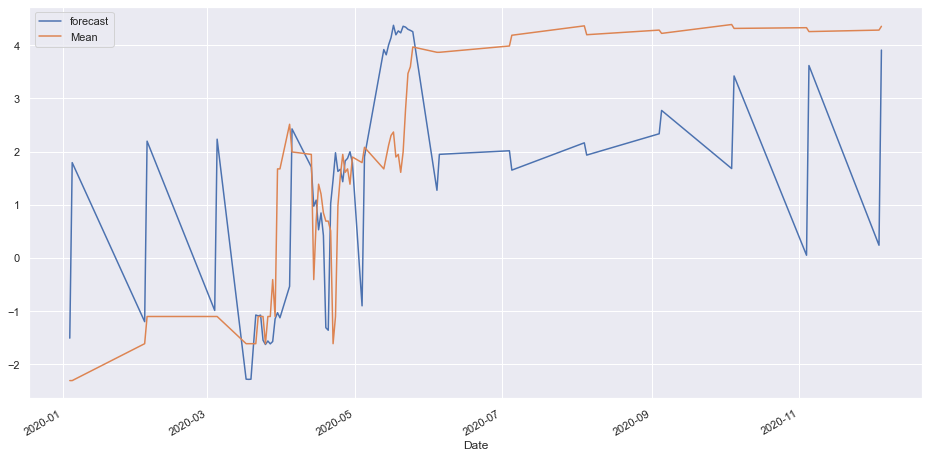

In [78]:
sns.set(rc={'figure.figsize':(16, 8)})
results_ARIMA.plot_predict(1,70)
x=results_ARIMA.forecast(steps=70)

The data has been taken form 16th marh upto 16th April i.e. for 31 days and the number of COVID19 cases has been predicted for next 39 days. The pick will reach around the 40th day i.e. 25th to 30th April. The maximum number of daily new cases will be around 30 at the pick. The number of daily cases woill come to zero around first week of June. 
The Cumulative confirmed cases would be around 150.We can expect 75 to 90 new cases in our state. 

In [79]:
cases= np.exp(x[1])
cases

array([ 1.52815347,  1.77016432,  2.02837528,  2.23441976,  2.46681494,
        2.66527178,  2.88858458,  3.08640234,  3.30644969,  3.50636263,
        3.72590208,  3.92919648,  4.14975273,  4.35707828,  4.57957183,
        4.79125526,  5.01627041,  5.23245864,  5.46037496,  5.68110815,
        5.91217175,  6.13742368,  6.37178896,  6.60149077,  6.83924646,
        7.07330125,  7.31448747,  7.55277954,  7.79739952,  8.03980049,
        8.28782886,  8.5342018 ,  8.78559066,  9.03579286,  9.29047644,
        9.54436139,  9.80225954, 10.05967832, 10.32069932, 10.58150166,
       10.84554445, 11.10957939, 11.37653541, 11.64365192, 11.91340658,
       12.18345398, 12.45588794, 12.72871621, 13.00370638, 13.27916645,
       13.55658692, 13.83453089, 14.11425368, 14.39453498, 14.67643068,
       14.95890425, 15.24284256, 15.52736498, 15.81321524, 16.09964484,
       16.38727642, 16.67547341, 16.96475607, 17.25458262, 17.54538683,
       17.83670719, 18.12890443, 18.42158497, 18.71504795, 19.00

In [90]:
di= np.exp(3.5)
di

33.11545195869231

In [81]:
cases0 = np.exp(x[0])
cases0

array([2794.00272821, 2766.11914776, 2688.46287217, 2657.72355381,
       2587.38097055, 2554.7404525 , 2490.60696025, 2456.8070272 ,
       2397.98296037, 2363.5970583 , 2309.34700485, 2274.81550077,
       2224.53589044, 2190.19406362, 2143.3873257 , 2109.48758712,
       2065.7415296 , 2032.47105709, 1991.44239809, 1958.9371299 ,
       1920.33833312, 1888.6940683 , 1852.28280895, 1821.56400879,
       1787.13473521, 1757.38149787, 1724.7586636 , 1695.9922469 ,
       1665.02487537, 1637.25206584, 1607.80937868, 1581.02594372,
       1552.99383875, 1527.18725028, 1500.46545884, 1475.61703815,
       1450.11682591, 1426.20342881, 1401.84573194, 1378.841069  ,
       1355.55497927, 1333.43064643, 1311.15217651, 1289.87845606,
       1268.54952985, 1248.09600944, 1227.66363355, 1207.99968122,
       1188.41526252, 1169.51038784, 1150.72916878, 1132.55329422,
       1114.53388357, 1097.05754506, 1079.76152589, 1062.95601789,
       1046.34761834, 1030.18509532, 1014.23091055,  998.68445

In [82]:
cases.sum() - cases0.sum()- (15*7)

-111653.03609376919

In [83]:
x[2]

array([[ 7.10408794,  8.76637309],
       [ 6.80591929,  9.04448188],
       [ 6.51056953,  9.28288024],
       [ 6.30945029,  9.46100016],
       [ 6.08869542,  9.62810744],
       [ 5.92434139,  9.76707043],
       [ 5.74121736,  9.89934608],
       [ 5.59772642, 10.01550924],
       [ 5.43851127, 10.12625519],
       [ 5.30900985, 10.22686998],
       [ 5.16676183, 10.32267834],
       [ 5.04757102, 10.41173744],
       [ 4.91817929, 10.49642788],
       [ 4.80706708, 10.57642378],
       [ 4.68785073, 10.65243471],
       [ 4.5833436 , 10.72505709],
       [ 4.47243666, 10.79405241],
       [ 4.37349991, 10.86051529],
       [ 4.26954139, 10.92368757],
       [ 4.17541312, 10.98490153],
       [ 4.07737473, 11.0431386 ],
       [ 3.98747233, 11.09980947],
       [ 3.89455547, 11.15379274],
       [ 3.80841955, 11.20648196],
       [ 3.71999014, 11.25674768],
       [ 3.63724913, 11.30591126],
       [ 3.55279443, 11.3528904 ],
       [ 3.4731414 , 11.39890509],
       [ 3.39224036,

In [93]:
dhi=np.exp(-3.6)
dhi

0.02732372244729256

In [92]:
dhir = np.exp(7.5)
dhir

1808.0424144560632